# Outline
## Import requirements
## LSm
### -----1. Preparation for calculation 
### ---- 2. Calculation
### ---- 3. Import result
### ---- 4. Score distribution
### ---- 5. Top-ranking trees
### ---- 6. DAG

## CSN
### ---- 1. Preparation for calculation 
### ---- 2. Calculation
### ---- 3. Import result
### ---- 4. Score distribution
### ---- 5. Top-ranking trees
### ---- 6. DAG
### ---- 7. Quantification of two-branch feature
### ---- 8. K-S test
### ---- 9. Bootstrap p-value

# Import requirements 

In [1]:
from src.data_converter import excel_reader, all_pair_generator, subcom_dict_generator
from src.data_converter import subunit_converter, csv_reader, save_dict, timer 
from src.generators import structure_generator, tree_generator, assign_element
from src.generators import gen_code_ls, gen_bins, return_bins_index
from src.calculator import parameter_assignment, calculation_func, sort_a
from src.result_reader import results
from src.network_drawer import draw_tree, cutoff_gate, check_top_ranking_trees
from src.DAG_quantification import normalize_edge, calculate_distance
from src.DAG_quantification import generate_random_ctrl_ks
from multiprocessing import Pool
from matplotlib import pyplot as plt 
from scipy import stats
import seaborn as sns
import networkx as nx 
import numpy as np 
import string
import os 
import time 
from itertools import combinations as comb 

# LSm

## 1. Preparation for calculation 

In [2]:
complex_name = 'LSm'
real_names = ['1', '2', '3', '6', '5', '7', '4']
sub_num = len(real_names)
mono_degrad = True
cal_state = True
subunit_ls = [i for i in string.ascii_lowercase[:sub_num]]
dict_for_convert = {subunit_ls[i]:real_names[i] for i in range(sub_num)}
dict_for_convert_re = {real_names[i]:subunit_ls[i] for i in range(sub_num)}
stablize_dict = csv_reader('data/LSm.csv', sub_num)
all_pair_dict = all_pair_generator(stablize_dict, sub_num)
subcom_dict = subcom_dict_generator(stablize_dict, sub_num)
all_structure = structure_generator(sub_num)

Successfully convert the data to all_pairs_dictionary!
Number of total pairs: 1932
run time: 0.003467082977294922 s


## 2. Calculation 

In [3]:
parameters, cpu_number = parameter_assignment(all_structure, subunit_ls, all_pair_dict, 
                                            stablize_dict, subcom_dict, complex_name, mono_degrad, cal_state)
start = time.time()
try: #try using multiple CPUs to calculate
    with Pool(cpu_number) as p:
        p.starmap(calculation_func, parameters)
except:
    for para in parameters:
        calculation_func(*para)    
end = time.time()
print(f'Time for calculation: {end-start:.4f} s')

Time for calculation: 0.8705 s


## 3. Import result

In [4]:
folder = f'result/tree_score/{complex_name}/'
files = [i for i in os.listdir(folder) if i.endswith('.txt')]
LSm_cal_state = results(folder, files)

## 4. Score distribution

/Users/klhsu/Desktop/source code/src/result_reader.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticklabels(), fontsize=20)


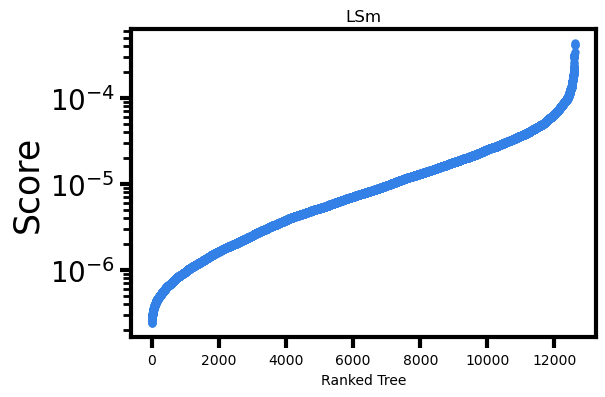

In [5]:
LSm_cal_state.plot_All(save=False, complex_name=complex_name)

## 5. Top-ranking trees

0.0004279720316378604


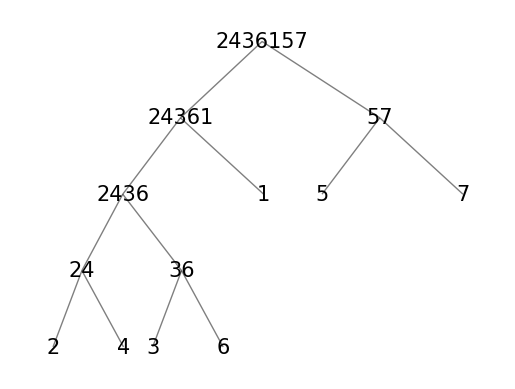

In [6]:
num = 1
for i in LSm_cal_state.sorted_All[-num:]:
    old_string, item = i 
    ind, score = item
    structure = LSm_cal_state.structure_ls[ind]
    order = subunit_converter(old_string, dict_for_convert) 
    tree = assign_element(structure, order) 
    print(score)
    draw_tree(tree, if_save=False, filename=f'result/tree_info/LSm_top{num}.txt')
    num -= 1

## 6. DAG of top-ranking trees

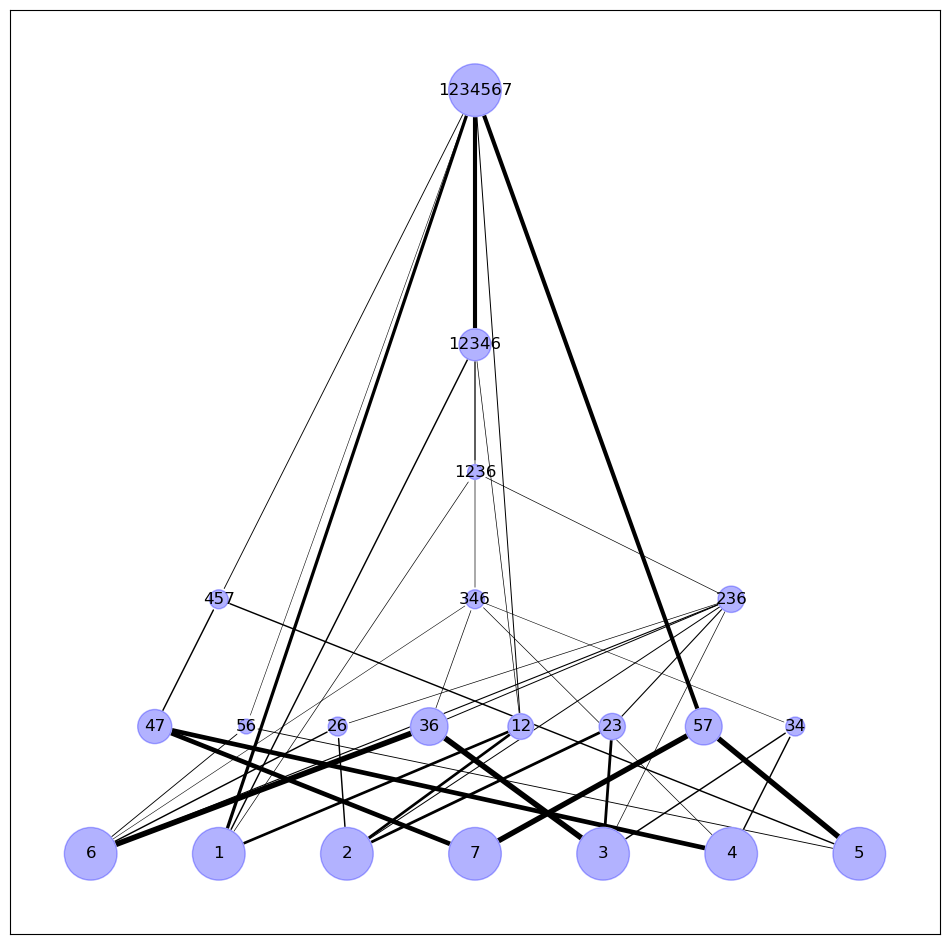

40
21


In [7]:
top_num = 100
threshold = 5
target = LSm_cal_state
convert = dict_for_convert
convert_re = dict_for_convert_re
final = '1234567'
number = sub_num 
prefix = '_lsm_'
plt.style.use(['default'])
    
edge_list = cutoff_gate(top_num, threshold, target, convert, convert_re, final, number, prefix, if_save=False)

# CSN

## 1. Preparation for calculation

In [2]:
complex_name = 'CSN'
real_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
sub_num = len(real_names)
mono_degrad = False
cal_state = False 
subunit_ls = [i for i in string.ascii_lowercase[:sub_num]]
dict_for_convert = {subunit_ls[i]:real_names[i] for i in range(sub_num)}
dict_for_convert_re = {real_names[i]:subunit_ls[i] for i in range(sub_num)}
stablize_dict = csv_reader('data/CSN.csv', sub_num)
all_pair_dict = all_pair_generator(stablize_dict, sub_num)
subcom_dict = subcom_dict_generator(stablize_dict, sub_num)
all_structure = structure_generator(sub_num)

Successfully convert the data to all_pairs_dictionary!
Number of total pairs: 18660
run time: 0.06525111198425293 s


## 2. Calculation

In [3]:
parameters, cpu_number = parameter_assignment(all_structure, subunit_ls, all_pair_dict, 
                                            stablize_dict, subcom_dict, complex_name, mono_degrad, cal_state)
start = time.time()
try: #try using multiple CPUs to calculate
    with Pool(cpu_number) as p:
        p.starmap(calculation_func, parameters)
except:
    for para in parameters:
        calculation_func(*para)    
end = time.time()
print(f'Time for calculation: {end-start:.4f} s')

Time for calculation: 42.0718 s


## 3. Import the result

In [4]:
folder = 'result/tree_score/CSN/'
files = [file for file in os.listdir(folder) if file.endswith('.txt')]
CSN = results(folder, files)

## 4. Score distribution

/Users/klhsu/Desktop/source code/src/result_reader.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticklabels(), fontsize=20)


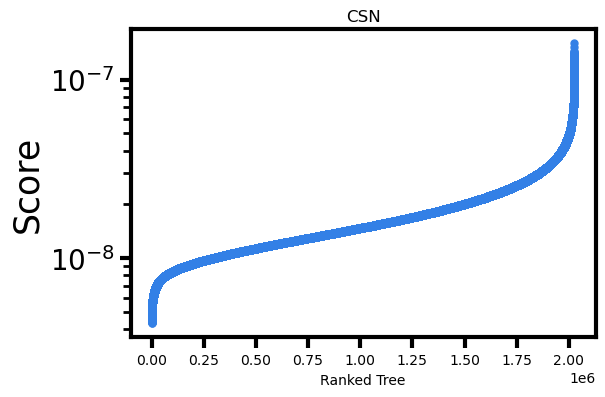

In [5]:
CSN.plot_All(save=False, complex_name='CSN')

## 5. Top-ranking trees

1.375824767129688e-07


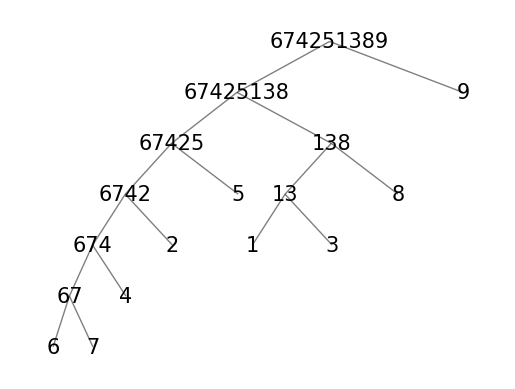

1.389973006446349e-07


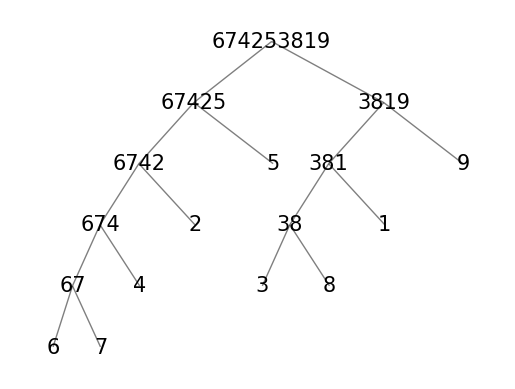

1.3940227154916304e-07


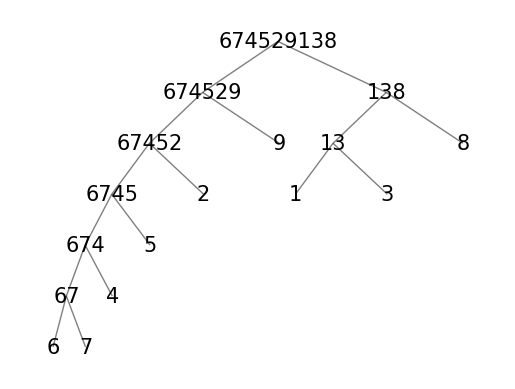

1.3940551241291303e-07


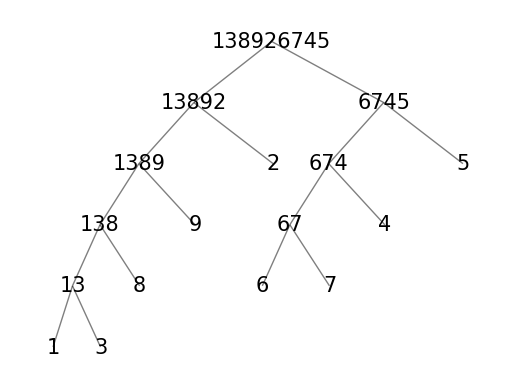

1.4111965910888105e-07


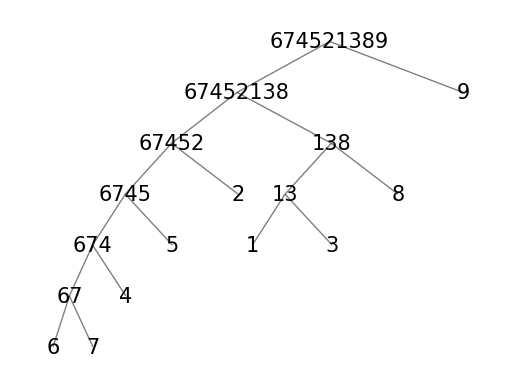

1.4288782172955293e-07


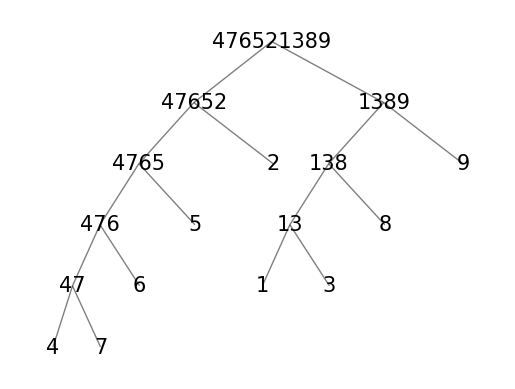

1.4333210295391016e-07


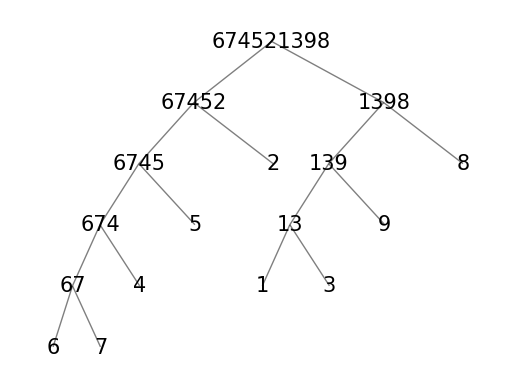

1.4502821022480658e-07


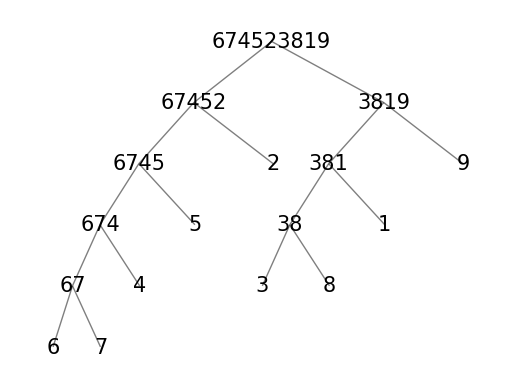

1.5257345999587074e-07


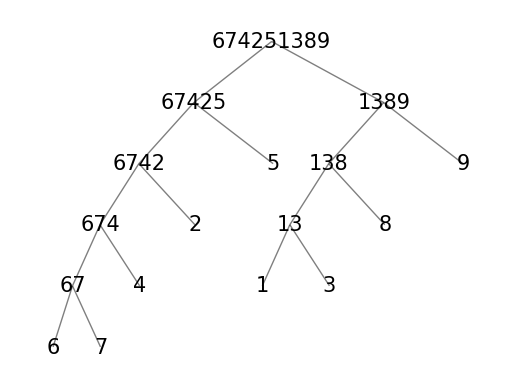

1.591934212275032e-07


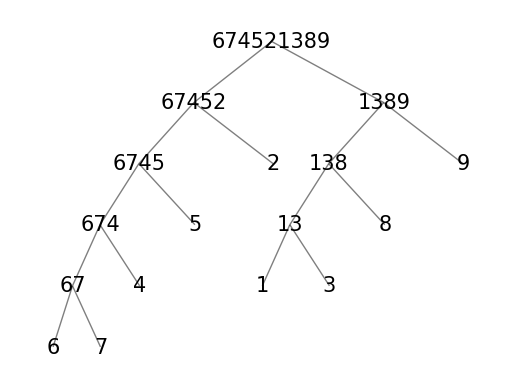

In [6]:
num = 10
for i in CSN.sorted_All[-num:]:
    old_string, item = i 
    ind, score = item
    structure = CSN.structure_ls[ind]
    order = subunit_converter(old_string, dict_for_convert) 
    tree = assign_element(structure, order) 
    print(score)
    draw_tree(tree, if_save=False, filename=f'result/tree_info/{complex_name}_top{num}.txt')
    num -= 1

## 6. DAG of top-ranking trees

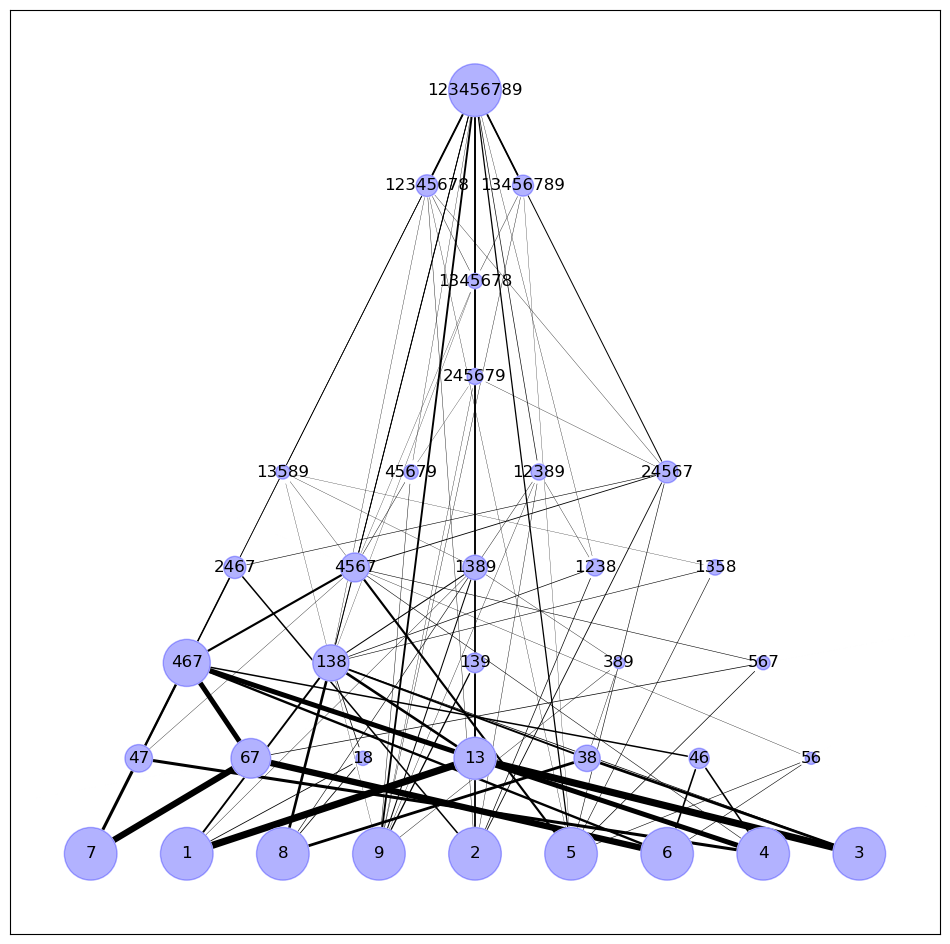

95
35


In [7]:
top_num = 2000
threshold = 45
target = CSN 
convert = dict_for_convert 
convert_re = dict_for_convert_re
final = '123456789'
number = sub_num 
prefix = '_csn_'
    
edge_list = cutoff_gate(top_num, threshold, target, convert, convert_re, final, number, prefix, if_save=False)

## 7. Quantification of two-branch feature

In [14]:
All_subunits = [str(i) for i in range(1, 1+9)]
All_pairs = [i for i in comb(All_subunits, 2)]

nG=nx.DiGraph()
nG.add_weighted_edges_from(edge_list)
edge_dict = {(i[0], i[1]):i[2] for i in edge_list}

new_edge_list = normalize_edge(nG, edge_dict)
edge_weight_dict = {(i[0],i[1]):i[2]for i in new_edge_list} 
pairwise_distance_dict = calculate_distance(All_pairs, nG, edge_weight_dict)

## 8. K-S test

In [15]:
group1 = ['6', '7', '4', '5', '2']
group2 = ['1', '3', '8', '9']

group1_intra_pairs = [i for i in All_pairs if set(i).issubset(set(group1))]
group2_intra_pairs = [i for i in All_pairs if set(i).issubset(set(group2))]
inter_pairs = [i for i in All_pairs if set(i).intersection(set(group1)) != set() and set(i).intersection(set(group2)) != set()]

group1_intra_distance = {i:pairwise_distance_dict[i] for i in group1_intra_pairs} 
group2_intra_distance = {i:pairwise_distance_dict[i] for i in group2_intra_pairs}
inter_distance = {i:pairwise_distance_dict[i] for i in inter_pairs}
intra_distance = {i:pairwise_distance_dict[i] for i in group1_intra_pairs + group2_intra_pairs} 

intra_ = list(group1_intra_distance.values()) + list(group2_intra_distance.values())
inter_ = list(inter_distance.values()) 
statistic, pvalue = stats.ks_2samp(intra_, inter_)
print(f'p-value: {pvalue}')

p-value: 3.9081143690129527e-07


/Users/klhsu/miniforge3/envs/py38_native/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


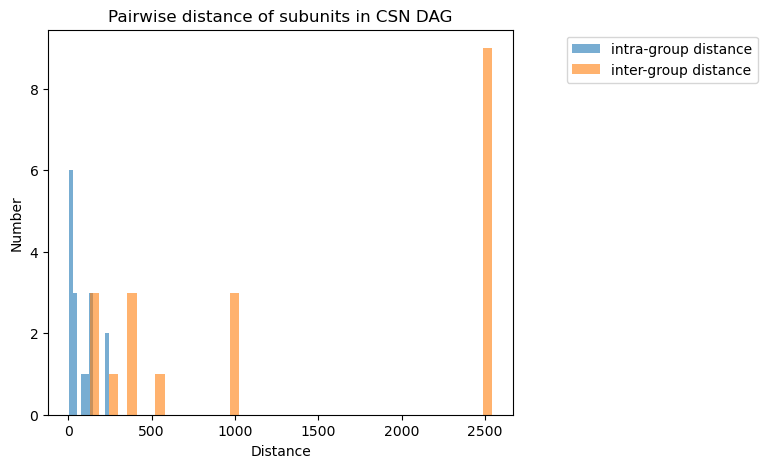

In [16]:
plt.figure(figsize=(6, 5))
sns.distplot(intra_,bins=10,label='intra-group distance', kde=False, hist_kws={"alpha":0.6}) #color=sns.color_palette()[4]
sns.distplot(inter_,bins=43, label='inter-group distance', kde=False, hist_kws={"alpha":0.6}) #color='green'
plt.title('Pairwise distance of subunits in CSN DAG')
plt.ylabel('Number')
plt.xlabel('Distance')
#plt.xlim(0, np.array(inter_).max())
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

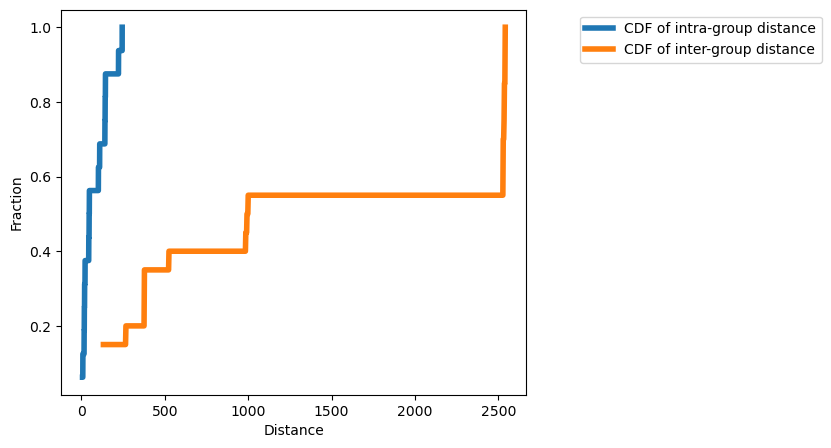

In [17]:
data = intra_
count, bins_count = np.histogram(data, bins=1000,density=True)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

plt.figure(figsize=(6, 5))

plt.plot(bins_count[1:], cdf, label="CDF of intra-group distance", linewidth=4) #sns.color_palette()[4]

data = inter_
count, bins_count = np.histogram(data, bins=1000, density=True)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

plt.plot(bins_count[1:], cdf, label="CDF of inter-group distance", linewidth=4) #color=green

plt.ylabel('Fraction')
plt.xlabel('Distance') 
#plt.xlim(0, 2256)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

## 9. Bootstrap p-value

In [18]:
start = time.time()

random_set_p_values = []
N = 10000
for i in range(N):
    p = generate_random_ctrl_ks(All_subunits, All_pairs, new_edge_list, group1, group2)
    random_set_p_values.append(p)
    
end = time.time()
print(end - start)

333.8766143321991


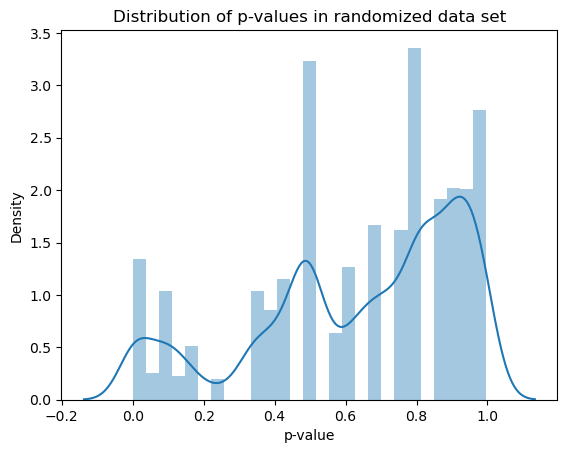

In [19]:
sns.distplot(random_set_p_values)
plt.title('Distribution of p-values in randomized data set')
plt.ylabel('Density')
plt.xlabel('p-value')
plt.show()

In [20]:
random_set_p_values = []
N = 10000
for i in range(N):
    p = generate_random_ctrl_ks(All_subunits, All_pairs, new_edge_list, group1, group2)
    random_set_p_values.append(p)

bootstrap_p = len([i for i in random_set_p_values if i <= pvalue])/N
print(f'Bootstrap p-value = {bootstrap_p}')

Bootstrap p-value = 0.0078
